In [1]:
#%reset -f
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.options.mode.use_inf_as_na = False
pd.option_context('mode.use_inf_as_na', True)

import statistics as stats

import seaborn as sns
%matplotlib inline

import math
from math import(e)

from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve

from matplotlib_venn import venn3, venn3_circles

C:\Users\eduju\AppData\Local\Temp\ipykernel_16268\1424517268.py:6: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = False


In [2]:
listIndex = ['waterLog', 'MNDWI', 'NDWI', 'AWEInsh', 'AWEIsh']
listCity = ['Sao Paulo', 'Curitiba', 'Florianopolis', 'Porto Alegre', 'Buenos Aires', 'Vina del Mar']

In [3]:
import os
path = 'C:\\Users\\eduju\\OneDrive\\Documentos\\Doutorado\\artigos\\ÍndiceÁgua\\ArcGis\\exportFromGEE'
#os.listdir(path)
os.chdir(path)

df = pd.read_csv('samplePointsCities_20240717_harmonized.csv', sep=',', decimal='.')
df.replace([np.inf, -np.inf], np.nan, inplace=True)

def reclassify(value):
    if value == 'water':
        return 1
    if value != 'water':
        return 0

df['surfClass'] = df['surface'].apply(reclassify)

print(len(df))
print(df.head(1))

123780
      B2     B3     B4     B8    B11    B12      city surface  surfClass
0  383.0  701.0  390.0  753.0  126.0  104.0  Curitiba   water          1


In [4]:
multiply = 100

def logn(number):
    return math.log(number)

def multiplier(number):
    return number * multiply
df['B3Log']     = df['B3'].apply(logn)
df['B3LogMult'] = df['B3Log'].apply(multiplier)

df['NDWI']    = (df['B3']        - df['B8'])  / (df['B3']        + df['B8'])
df['MNDWI']   = (df['B3']        - df['B11']) / (df['B3']        + df['B11'])
df['MNDWIe']  = (df['B3Log']     - df['B11']) / (df['B3Log']     + df['B11'])
df['waterLog'] = (df['B3LogMult'] - df['B11']) / (df['B3LogMult'] + df['B11'])

print(df.head(1))
#df.to_excel('teste.xlsx', index=False)

      B2     B3     B4     B8    B11    B12      city surface  surfClass  \
0  383.0  701.0  390.0  753.0  126.0  104.0  Curitiba   water          1   

      B3Log   B3LogMult      NDWI     MNDWI    MNDWIe  waterLog  
0  6.552508  655.250789 -0.035763  0.695284 -0.901133   0.67744  


      B2     B3     B4     B8    B11    B12      city surface  surfClass  \
0  383.0  701.0  390.0  753.0  126.0  104.0  Curitiba   water          1   

      B3Log   B3LogMult      NDWI     MNDWI    MNDWIe  waterLog  
0  6.552508  655.250789 -0.035763  0.695284 -0.901133   0.67744  


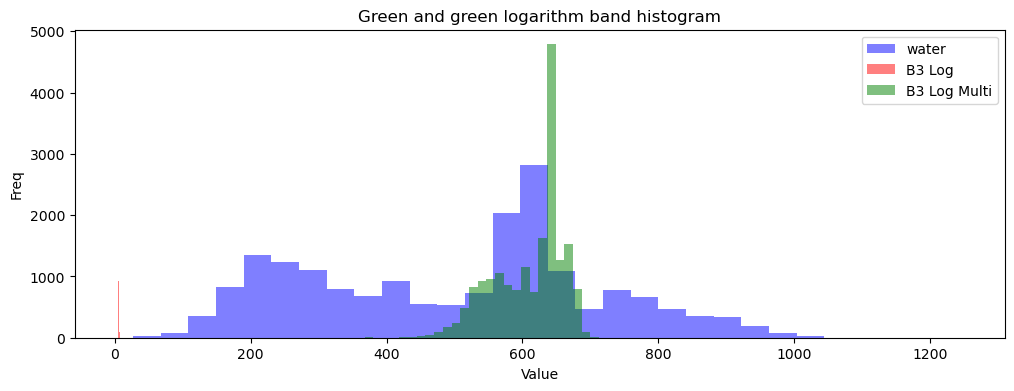

In [19]:
water = df[df['surfClass'] == 1]
print(water.head(1))

B3 = water['B3']
B3Log = water['B3Log']
B3LogMult = water['B3LogMult']

plt.figure(figsize=(12,4))
plt.hist(B3, bins=30, alpha=0.5, label='water', color='blue')
plt.hist(B3Log, bins=30, alpha=0.5, label='B3 Log', color='red')
plt.hist(B3LogMult, bins=30, alpha=0.5, label='B3 Log Multi', color='green')

plt.title('Green and green logarithm band histogram')
plt.xlabel('Value')
plt.ylabel('Freq')
plt.legend()

#plt.savefig('histogram_1', dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()

## Indices histogram

C:\Users\eduju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eduju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eduju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


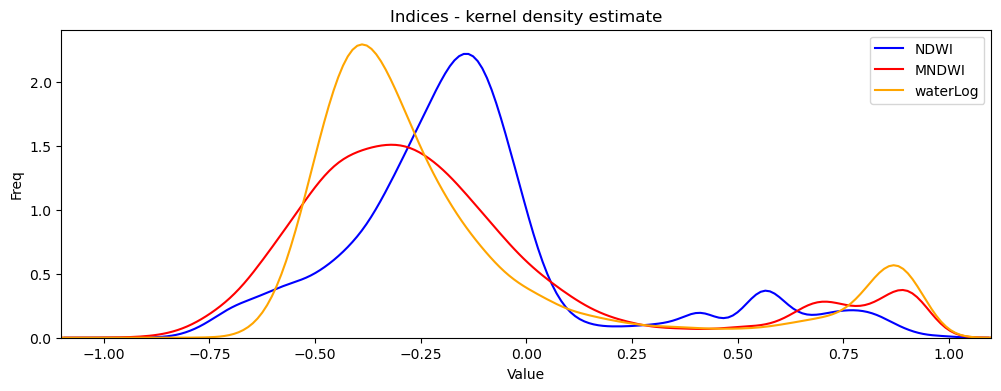

In [10]:
ndwi = df['NDWI']
mndwi = df['MNDWI']
mndwie = df['MNDWIe']
waterLog = df['waterLog']

plt.figure(figsize=(12,4))

sns.kdeplot(ndwi,    label = 'NDWI',    color='blue')
sns.kdeplot(mndwi,   label = 'MNDWI',   color='red')
#sns.kdeplot(mndwie,  label = 'MNDWIe',  color='green')
sns.kdeplot(waterLog, label = 'waterLog', color='orange')

#plt.hist(ndwi, bins=30, histtype='step', alpha=0.5, label='NDWI', color='blue')
#plt.hist(mndwi, bins=30, histtype='step', alpha=0.5, label='MNDWI', color='red')
#plt.hist(mndwie, bins=30, histtype='step', alpha=0.5, label='MNDWIe', color='green')
#plt.hist(mndwiem, bins=30, histtype='step', alpha=0.5, label='MNDWIem', color='orange')

plt.title('Indices - kernel density estimate')
plt.xlabel('Value')
plt.ylabel('Freq')

plt.xlim([-1.1, 1.1])
plt.legend()

plt.show()

In [11]:
SR_column = ['B2', 'B3', 'B4', 'B8', 'B11', 'B12']
scale = 10000

df_SR = df.copy().drop(columns =['B3Log', 'B3LogMult', 'NDWI', 'MNDWI', 'MNDWIe', 'waterLog'])
df_SR[SR_column] = df_SR[SR_column] / scale
print(df_SR.head(1))

       B2      B3     B4      B8     B11     B12      city surface  surfClass
0  0.0383  0.0701  0.039  0.0753  0.0126  0.0104  Curitiba   water          1


### Indices calc

In [12]:
def powe(number):
    return number ** (1 / e)

def powMult(number):
    return number / 6

df_SR['B3Pow']     = df_SR['B3'].apply(powe)
df_SR['B3PowMult'] = df_SR['B3Pow'].apply(powMult)

df_SR['NDWI']    = (df_SR['B3'] - df_SR['B8'])         / (df_SR['B3'] + df_SR['B8'])
df_SR['MNDWI']   = (df_SR['B3'] - df_SR['B11'])        / (df_SR['B3'] + df_SR['B11'])
df_SR['MNDWIe']  = (df_SR['B3Pow'] - df_SR['B11'])     / (df_SR['B3Pow'] + df_SR['B11'])
df_SR['waterLog'] = (df_SR['B3PowMult'] - df_SR['B11']) / (df_SR['B3PowMult'] + df_SR['B11'])
 # AWEIsh =            blue     + 2.5 x    green    - 1.5 x (   Nir      +     Swir1   ) - 0.25 x   Swir2
df_SR['AWEIsh']   = df_SR['B2'] + 2.5 * df_SR['B3'] - 1.5 * (df_SR['B8'] + df_SR['B11']) - 0.25 * df_SR['B12']
 # AWEInsh        = 4 x (   green    -    Swir1    ) - (0.25 x      Nir    + 2.75 x    Swir2    )
df_SR['AWEInsh']  = 4 * (df_SR['B3'] - df_SR['B11']) - (0.25 * df_SR['B8'] + 2.75 * df_SR['B12'])
print(df_SR.head(1))
print('------------------------')
print('waterLog: from ',round(df_SR['waterLog'].min(), 4),' to ',round(df_SR['waterLog'].max(), 4))
print('MNDWI: from ',round(df_SR['MNDWI'].min(), 4),' to ',round(df_SR['MNDWI'].max(), 4))
print('NDWI: from ',round(df_SR['NDWI'].min(), 4),' to ',round(df_SR['NDWI'].max(), 4))
print('AWEIsh: from ',round(df_SR['AWEIsh'].min(), 4),' to ',round(df_SR['AWEIsh'].max(), 4))
print('AWEInsh: from ',round(df_SR['AWEInsh'].min(), 4),' to ',round(df_SR['AWEInsh'].max(), 4))


       B2      B3     B4      B8     B11     B12      city surface  surfClass  \
0  0.0383  0.0701  0.039  0.0753  0.0126  0.0104  Curitiba   water          1   

      B3Pow  B3PowMult      NDWI     MNDWI    MNDWIe  waterLog  AWEIsh  \
0  0.376152   0.062692 -0.035763  0.695284  0.935177  0.665303  0.0791   

    AWEInsh  
0  0.182575  
------------------------
waterLog: from  -0.9453  to  0.9968
MNDWI: from  -0.999  to  0.9972
NDWI: from  -0.9968  to  0.9968
AWEIsh: from  -1.0052  to  1.9856
AWEInsh: from  -3.7391  to  1.4946


## Surface reflectance histogram

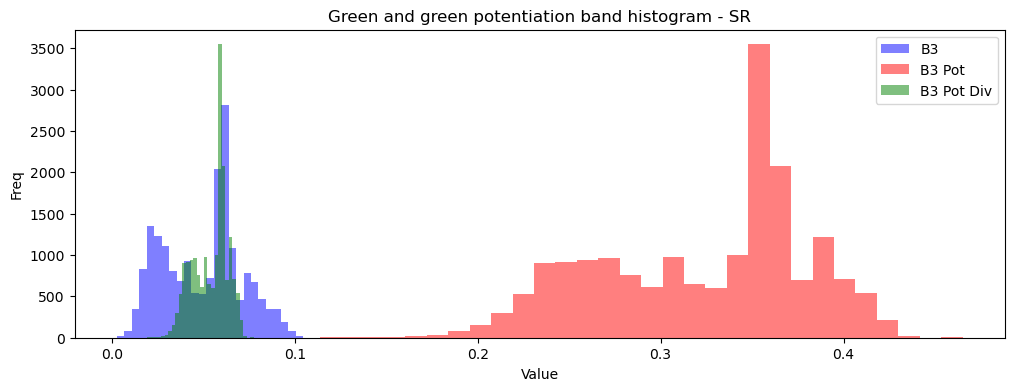

In [20]:
water_SR = df_SR[df_SR['surfClass'] == 1]

B3_SR = water_SR['B3']
B3_SR_exp = water_SR['B3Pow']
B3_SR_expDiv = water_SR['B3PowMult']

plt.figure(figsize=(12,4))
plt.hist(B3_SR, bins=30, alpha=0.5, label='B3', color='blue')
plt.hist(B3_SR_exp, bins=30, alpha=0.5, label='B3 Pot', color='red')
plt.hist(B3_SR_expDiv, bins=30, alpha=0.5, label='B3 Pot Div', color='green')

plt.title('Green and green potentiation band histogram - SR')
plt.xlabel('Value')
plt.ylabel('Freq')
plt.legend()
#plt.savefig('Histogram_1_exp', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

## Surface reflectance KDE

In [48]:
def kdePlot(water, nonWater, index):
    plt.figure(figsize=(6,3))
    sns.kdeplot(nonWater,   label = 'non-water', color='red')#, bw_adjust=0.25, cut=0)
    sns.kdeplot(water,      label = 'water'    , color='blue')#  , bw_adjust=0.25, cut=0)

    plt.title(index, fontsize=18)
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Freq', fontsize=14)
    
    plt.xlim([-1.2, 1.2])
    plt.ylim([0, 9])
    plt.legend()
    plt.savefig('KDE_'+index, dpi=300, bbox_inches='tight', pad_inches=0.1)
    plt.show()

C:\Users\eduju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eduju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


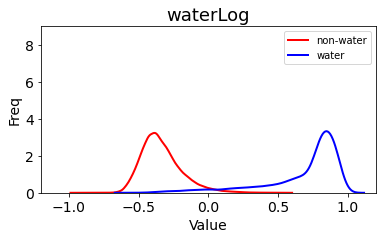

C:\Users\eduju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eduju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


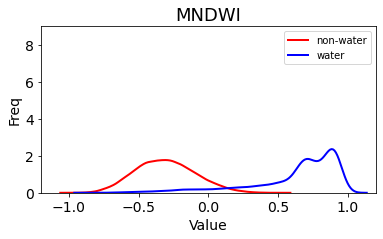

C:\Users\eduju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eduju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


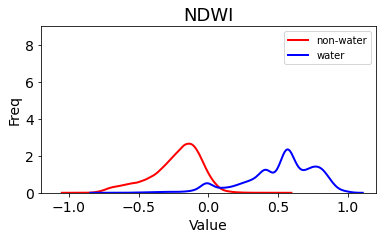

C:\Users\eduju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eduju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


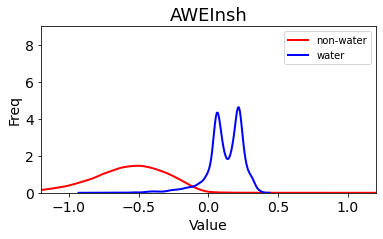

C:\Users\eduju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eduju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


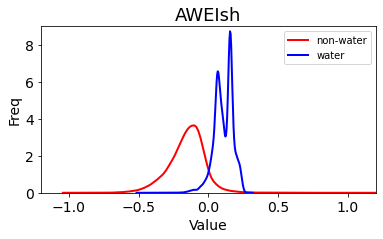

In [49]:
water = df_SR[df_SR['surfClass'] == 1]
nonWater = df_SR[df_SR['surfClass'] != 1]

for index in listIndex:
    waterIndex = water[index]
    nonWaterIndex = nonWater[index]
    kde = kdePlot(waterIndex, nonWaterIndex, index)

### ROC curve

In [23]:
surfClass = df_SR['surfClass'].tolist()
AWEInsh   = df_SR['AWEInsh'].tolist()
AWEIsh    = df_SR['AWEIsh'].tolist()
MNDWI     = df_SR['MNDWI'].tolist()
NDWI      = df_SR['NDWI'].tolist()
waterLog  = df_SR['waterLog'].tolist()

In [24]:
fprThreshold = 0.02
tprThreshold = 0.0

def partial_AUC(Y_true, Y_scores, index, munic):
    fpr, tpr, thresholds = roc_curve(Y_true, Y_scores)

    partial_fpr0 = fpr[fpr <= fprThreshold]
    partial_tpr0 = tpr[:len(partial_fpr0)]
       
    partial_tpr1 = partial_tpr0[partial_tpr0 >= tprThreshold]
    partial_fpr1 = partial_fpr0[-len(partial_tpr1):]
    
#    roc_function = interp1d(fpr, tpr, kind='linear', fill_value='extrapolate')
#    partial_fpr_auc_start = 0.0
#    partial_fpr_auc_end = 0.02
#    result, _ = quad(roc_function, partial_fpr_auc_start, partial_fpr_auc_end)
#    print(result-0.7*0.02)

    try:
        auc_value_1 = np.trapz(partial_tpr1, partial_fpr1)
#        print('AUC ',index,' :', auc_value_1)
        print('AUC ',index)
        auc_value = auc_value_1 -((np.max(partial_fpr1) - np.min(partial_fpr1)) * tprThreshold)
        #print('abaixo de 07',index,' :',(np.max(partial_fpr1) - np.min(partial_fpr1)) * tprThreshold)
        printPlot = 'yes'
    except ValueError:
        auc_value = 0
        printPlot = 'no'
    
    if printPlot == 'yes':
        plt.plot(partial_fpr1, partial_tpr1, label=f'{index}\n AUC = {auc_value:.4f})')
    else:
        plt.plot([], [], label=f'{index}\n AUC = {auc_value:.4f})')
        
    plt.xlabel(f"FPR <= {fprThreshold}", fontsize=16)
    plt.ylabel("TPR", fontsize=16)
    plt.xlim([0.0, fprThreshold])
    plt.xticks([0, fprThreshold/2, fprThreshold])
    plt.ylim([tprThreshold, 1])
    plt.yticks([tprThreshold, (1-tprThreshold)/4*1, (1-tprThreshold)/4*2, (1-tprThreshold)/4*3, 1])
    plt.title(' pAUC: '+str(round(auc_value,5)), fontsize=18)
    #plt.legend(loc='lower center')
    plt.rcParams['figure.figsize']=[2,6]
    plt.rcParams['figure.dpi']=72
    plt.rcParams['lines.linewidth']=2
    plt.rcParams['axes.labelsize'] = 3
    plt.rcParams['xtick.labelsize'] = 14  # Font size for x-axis ticks
    plt.rcParams['ytick.labelsize'] = 14  # Font size for y-axis ticks
    #plt.savefig('Partial_'+munic+'_'+index, dpi=300, bbox_inches='tight', pad_inches=0.1)
    plt.show()
#    print(munic,index, ':', round(auc_value,5))
    
    return auc_value


Partial Area Under Curve up to 0.02  of FPR - all the cities
AUC  waterLog


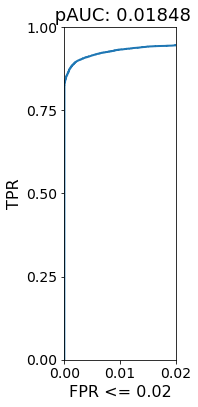

AUC  MNDWI


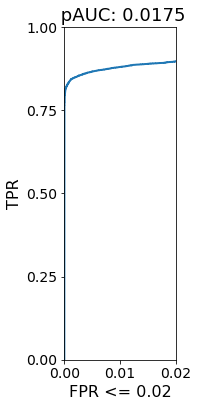

AUC  NDWI


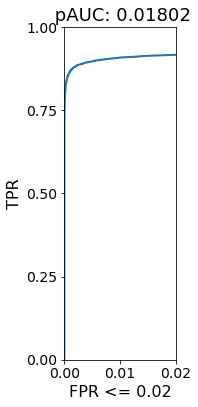

AUC  AWEInsh


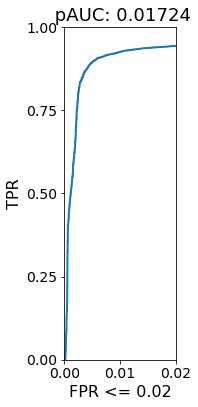

AUC  AWEIsh


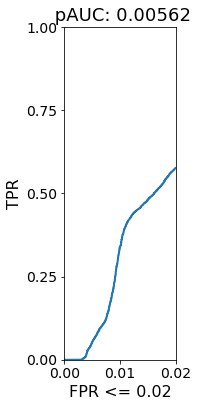


partial auc_waterLog: 0.01848
partial auc_MNDWI: 0.0175
partial auc_NDWI: 0.01802
partial auc_AWEInsh: 0.01724
partial auc_AWEIsh: 0.00562


In [26]:
print()
munic = ''
index = ''
print('Partial Area Under Curve up to',fprThreshold,' of FPR - all the cities')

partial_auc_waterLog  = partial_AUC(surfClass, waterLog, 'waterLog', 'allTheCities')
partial_auc_MNDWI     = partial_AUC(surfClass, MNDWI, 'MNDWI', 'allTheCities')
partial_auc_NDWI      = partial_AUC(surfClass, NDWI, 'NDWI', 'allTheCities')
partial_auc_AWEInsh   = partial_AUC(surfClass, AWEInsh, 'AWEInsh', 'allTheCities')
partial_auc_AWEIsh    = partial_AUC(surfClass, AWEIsh, 'AWEIsh', 'allTheCities')
print()
print('partial auc_waterLog:', round(partial_auc_waterLog,5))
print('partial auc_MNDWI:',    round(partial_auc_MNDWI,5))
print('partial auc_NDWI:',     round(partial_auc_NDWI,5))
print('partial auc_AWEInsh:',  round(partial_auc_AWEInsh,5))
print('partial auc_AWEIsh:',   round(partial_auc_AWEIsh,5))


Partial Area Under Curve up to 0.02  for Sao Paulo
AUC  waterLog


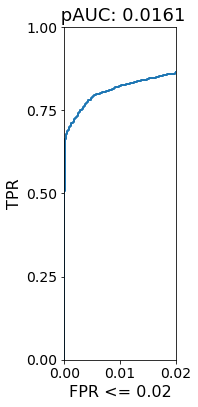

AUC  MNDWI


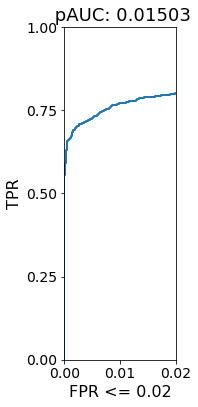

AUC  NDWI


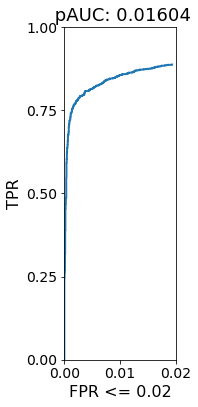

AUC  AWEInsh


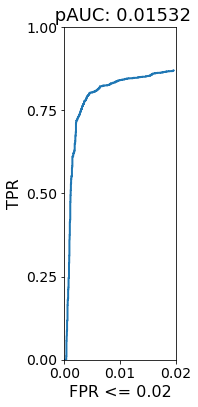

AUC  AWEIsh


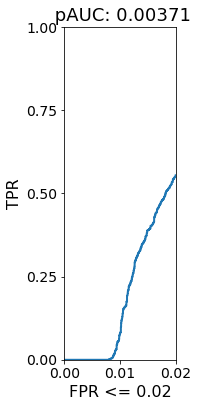


Sao Paulo partial auc_waterLog: 0.0161
Sao Paulo partial auc_MNDWI: 0.01503
Sao Paulo partial auc_NDWI: 0.01604
Sao Paulo partial auc_AWEInsh: 0.01532
Sao Paulo partial auc_AWEIsh: 0.00371

Partial Area Under Curve up to 0.02  for Curitiba
AUC  waterLog


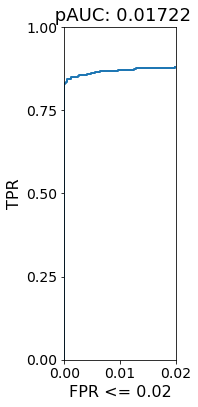

AUC  MNDWI


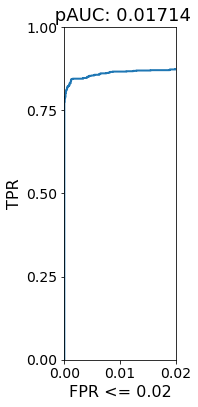

AUC  NDWI


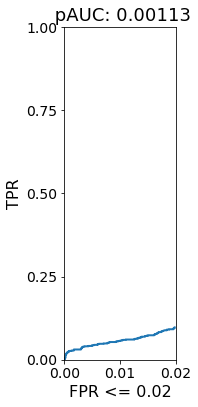

AUC  AWEInsh


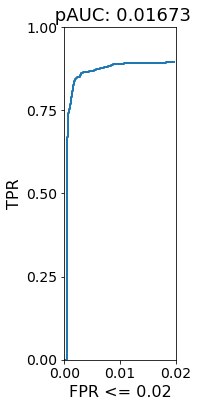

AUC  AWEIsh


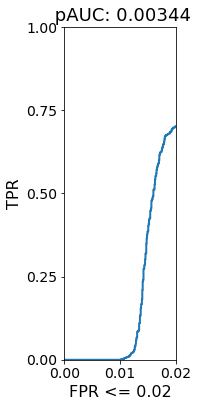


Curitiba partial auc_waterLog: 0.01722
Curitiba partial auc_MNDWI: 0.01714
Curitiba partial auc_NDWI: 0.00113
Curitiba partial auc_AWEInsh: 0.01673
Curitiba partial auc_AWEIsh: 0.00344

Partial Area Under Curve up to 0.02  for Florianopolis
AUC  waterLog


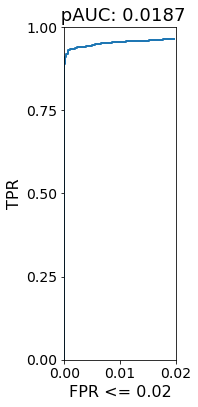

AUC  MNDWI


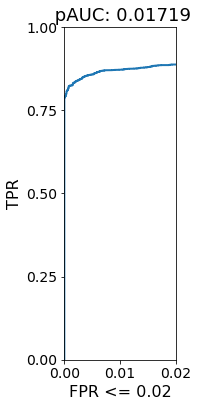

AUC  NDWI


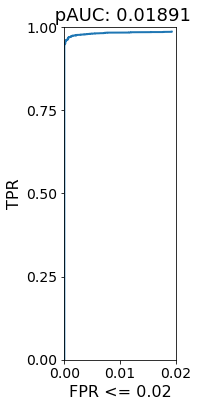

AUC  AWEInsh


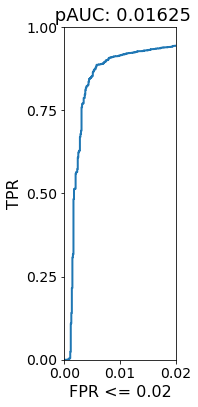

AUC  AWEIsh


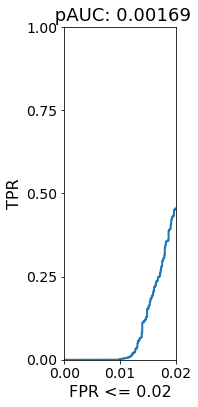


Florianopolis partial auc_waterLog: 0.0187
Florianopolis partial auc_MNDWI: 0.01719
Florianopolis partial auc_NDWI: 0.01891
Florianopolis partial auc_AWEInsh: 0.01625
Florianopolis partial auc_AWEIsh: 0.00169

Partial Area Under Curve up to 0.02  for Porto Alegre
AUC  waterLog


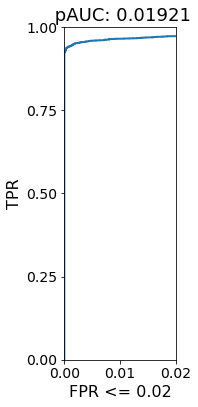

AUC  MNDWI


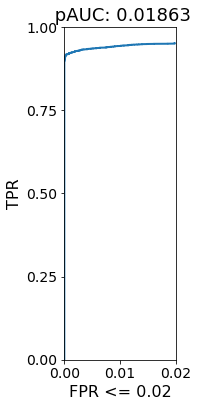

AUC  NDWI


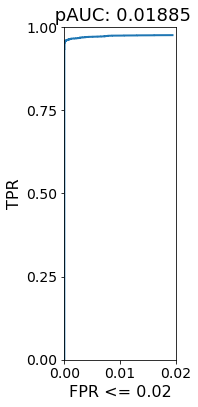

AUC  AWEInsh


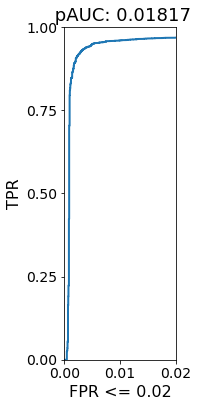

AUC  AWEIsh


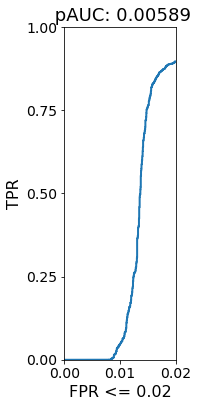


Porto Alegre partial auc_waterLog: 0.01921
Porto Alegre partial auc_MNDWI: 0.01863
Porto Alegre partial auc_NDWI: 0.01885
Porto Alegre partial auc_AWEInsh: 0.01817
Porto Alegre partial auc_AWEIsh: 0.00589

Partial Area Under Curve up to 0.02  for Buenos Aires
AUC  waterLog


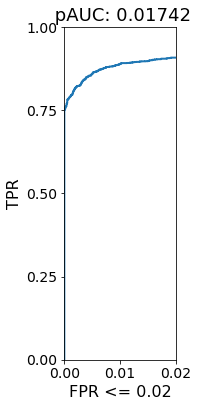

AUC  MNDWI


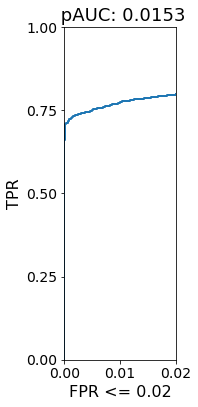

AUC  NDWI


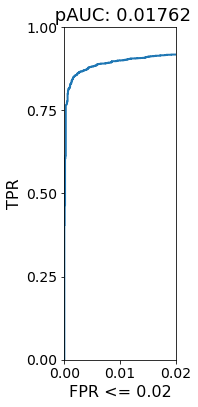

AUC  AWEInsh


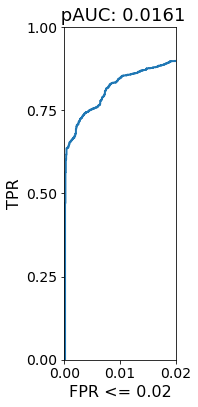

AUC  AWEIsh


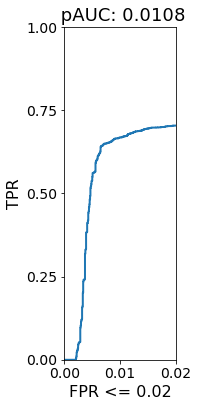


Buenos Aires partial auc_waterLog: 0.01742
Buenos Aires partial auc_MNDWI: 0.0153
Buenos Aires partial auc_NDWI: 0.01762
Buenos Aires partial auc_AWEInsh: 0.0161
Buenos Aires partial auc_AWEIsh: 0.0108

Partial Area Under Curve up to 0.02  for Vina del Mar
AUC  waterLog


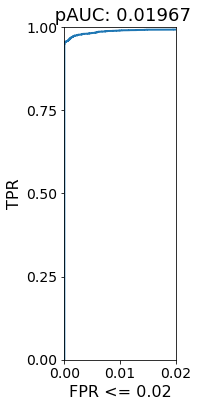

AUC  MNDWI


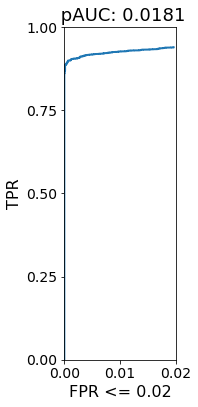

AUC  NDWI


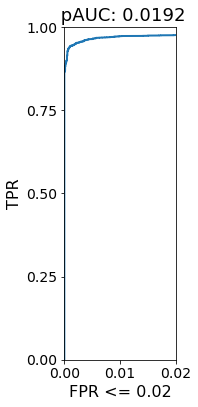

AUC  AWEInsh


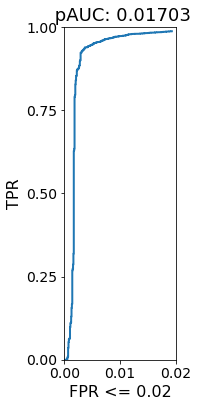

AUC  AWEIsh


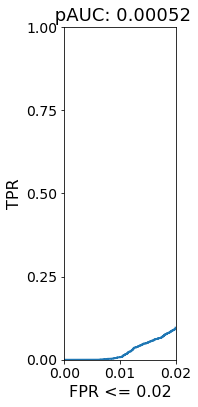


Vina del Mar partial auc_waterLog: 0.01967
Vina del Mar partial auc_MNDWI: 0.0181
Vina del Mar partial auc_NDWI: 0.0192
Vina del Mar partial auc_AWEInsh: 0.01703
Vina del Mar partial auc_AWEIsh: 0.00052


In [27]:
for munic in listCity:
    df_city = df_SR[df_SR['city'] == munic]
    
    surfClass_city = df_city['surfClass'].tolist()
    waterLog_city  = df_city['waterLog'].tolist()
    MNDWI_city     = df_city['MNDWI'].tolist()
    NDWI_city      = df_city['NDWI'].tolist()
    AWEInsh_city   = df_city['AWEInsh'].tolist()
    AWEIsh_city    = df_city['AWEIsh'].tolist()

    print()
    print('Partial Area Under Curve up to',fprThreshold,' for',munic)
    partial_auc_waterLog_city = partial_AUC(surfClass_city, waterLog_city, 'waterLog', munic)
    partial_auc_MNDWI_city    = partial_AUC(surfClass_city, MNDWI_city, 'MNDWI', munic)
    partial_auc_NDWI_city     = partial_AUC(surfClass_city, NDWI_city, 'NDWI', munic)
    partial_auc_AWEInsh_city  = partial_AUC(surfClass_city, AWEInsh_city, 'AWEInsh', munic)
    partial_auc_AWEIsh_city   = partial_AUC(surfClass_city, AWEIsh_city, 'AWEIsh', munic)
    print()
    print(munic,'partial auc_waterLog:', round(partial_auc_waterLog_city,5))
    print(munic,'partial auc_MNDWI:',    round(partial_auc_MNDWI_city,5))
    print(munic,'partial auc_NDWI:',     round(partial_auc_NDWI_city,5))
    print(munic,'partial auc_AWEInsh:',  round(partial_auc_AWEInsh_city,5))
    print(munic,'partial auc_AWEIsh:',   round(partial_auc_AWEIsh_city,5))


### Misclassification thresholds

In [28]:
waterSample = df_SR[df_SR['surfClass'] == 1]
nonWaterSample = df_SR[df_SR['surfClass'] == 0]

In [29]:
for index in listIndex:
    threshold = max(nonWaterSample[index])
    print(index+' threshold: '+str(threshold))
    waterList    = df_SR[df_SR['surfClass'] == 1][index]
    nonWaterList = df_SR[df_SR['surfClass'] == 0][index]
    countWater = sum(1 for i in waterList if i > threshold)
    print('Correct '+index+' water classified points in all the cities',countWater,
          '(',round(countWater/len(waterList),5),' - ',round(countWater/len(waterList)*100,2),'%)')
    countNonWater = sum(1 for i in nonWaterList if i <= threshold)
    print('Correct '+index+' non-water classified points in all the cities',countNonWater, '(',round(countNonWater/len(nonWaterList)*100,2), '%)')
    if countWater == 0:
        print(index+' Misclassification points in all the cities:',round(((len(waterList)-countWater+len(nonWaterList)-countNonWater))/(len(waterList)+len(nonWaterList)),4))
        print(index+' Water misclassification points in all the cities (%):',round(100,2))
    elif countWater != 0:
        print(index+' Water misclassification points in all the cities (%):',round((((len(waterList)-countWater))/len(waterList)*100),2))
    print()

waterLog threshold: 0.5558810402501263
Correct waterLog water classified points in all the cities 14517 ( 0.78394  -  78.39 %)
Correct waterLog non-water classified points in all the cities 105262 ( 100.0 %)
waterLog Water misclassification points in all the cities (%): 21.61

MNDWI threshold: 0.5236883942766296
Correct MNDWI water classified points in all the cities 13941 ( 0.75284  -  75.28 %)
Correct MNDWI non-water classified points in all the cities 105262 ( 100.0 %)
MNDWI Water misclassification points in all the cities (%): 24.72

NDWI threshold: 0.54
Correct NDWI water classified points in all the cities 10256 ( 0.55384  -  55.38 %)
Correct NDWI non-water classified points in all the cities 105262 ( 100.0 %)
NDWI Water misclassification points in all the cities (%): 44.62

AWEInsh threshold: 1.4946000000000002
Correct AWEInsh water classified points in all the cities 0 ( 0.0  -  0.0 %)
Correct AWEInsh non-water classified points in all the cities 105262 ( 100.0 %)
AWEInsh Miscl

In [30]:
for munic in listCity:
    df_city = df_SR[df_SR['city'] == munic]
    #print(df_city.head(1))
    print(munic)

    for index in listIndex:
        dfCityNonWater = df_city[df_city['surfClass'] == 0]
        threshold = max(dfCityNonWater[index])
        print()
#        print(index+' threshold: '+str(round(threshold, 4)))
        print(index+' threshold: '+str(threshold))
        waterList = df_city[df_city['surfClass'] == 1][index]
        print(len(waterList))
        nonWaterList = df_city[df_city['surfClass'] == 0][index]
        countWater = sum(1 for i in waterList if i > threshold)
        print('Correct '+index+' water classified points in all the cities',countWater,
          '(',round(countWater/len(waterList),5),' - ',round(countWater/len(waterList)*100,2),'%)')
        countNonWater = sum(1 for i in nonWaterList if i <= threshold)
        print('Correct '+index+' non-water classified points in '+munic+':',countNonWater, '(',round(countNonWater/len(nonWaterList)*100,1), '%)')
        if countWater == 0:
            print(index+' Misclassification points in '+munic+':',round(((len(waterList)-countWater+len(nonWaterList)-countNonWater))/(len(waterList)+len(nonWaterList)),4))
            print(index+'Water misclassification points in '+munic+'(%):',round(100,2))
        elif countWater != 0:
            print(index+' Water misclassification points in '+munic+'(%):',round((((len(waterList)-countWater))/len(waterList)*100),2))
        print()
        print()

Sao Paulo

waterLog threshold: 0.5558810402501263
1536
Correct waterLog water classified points in all the cities 779 ( 0.50716  -  50.72 %)
Correct waterLog non-water classified points in Sao Paulo: 26345 ( 100.0 %)
waterLog Water misclassification points in Sao Paulo(%): 49.28



MNDWI threshold: 0.40201567749160133
1536
Correct MNDWI water classified points in all the cities 853 ( 0.55534  -  55.53 %)
Correct MNDWI non-water classified points in Sao Paulo: 26345 ( 100.0 %)
MNDWI Water misclassification points in Sao Paulo(%): 44.47



NDWI threshold: 0.36030828516377644
1536
Correct NDWI water classified points in all the cities 378 ( 0.24609  -  24.61 %)
Correct NDWI non-water classified points in Sao Paulo: 26345 ( 100.0 %)
NDWI Water misclassification points in Sao Paulo(%): 75.39



AWEInsh threshold: 0.36112500000000014
1536
Correct AWEInsh water classified points in all the cities 0 ( 0.0  -  0.0 %)
Correct AWEInsh non-water classified points in Sao Paulo: 26345 ( 100.0 %)
AWE

#### Twenty comission points

In [31]:
for index in listIndex:
    indexValue = nonWaterSample[index].tolist()
    threshold = 0
    def get_tenth_highest_value(indexValue):
        sorted_list = sorted(indexValue, reverse=True)
        return sorted_list[19]
    
    threshold = get_tenth_highest_value(indexValue)
    
    print(index+' threshold: '+str(round(threshold, 16)))
    waterList    = df_SR[df_SR['surfClass'] == 1][index]
    nonWaterList = df_SR[df_SR['surfClass'] == 0][index]
    countWater = sum(1 for i in waterList if i > threshold)
    #print('Correct '+index+' water classified points in all the cities',countWater, '(',round(countWater/len(waterList)*100,2), '%)')
    countNonWater = sum(1 for i in nonWaterList if i <= threshold)
    #print('Correct '+index+' non-water classified points in all the cities',countNonWater, '(',round(countNonWater/len(nonWaterList)*100,2), '%)')
    #print(index+' Misclassification points in all the cities:',(len(waterList)-countWater+len(nonWaterList)-countNonWater))
    if countWater == 0:
        print(index+' Water misclassification points in all the cities(%):',round(100,2))
    elif countWater != 0:
        print(index+' Water misclassification points in all the cities (%):',round((((len(waterList)-countWater))/len(waterList)*100),2))
    print()

waterLog threshold: 0.4311668249239384
waterLog Water misclassification points in all the cities (%): 15.91

MNDWI threshold: 0.4020156774916013
MNDWI Water misclassification points in all the cities (%): 18.74

NDWI threshold: 0.3105413105413106
NDWI Water misclassification points in all the cities (%): 18.54

AWEInsh threshold: 0.3569
AWEInsh Water misclassification points in all the cities (%): 99.7

AWEIsh threshold: 0.5470250000000001
AWEIsh Water misclassification points in all the cities(%): 100



In [32]:
for munic in listCity:
    df_city = df_SR[df_SR['city'] == munic]
    print(munic)

    for index in listIndex:
        dfCityNonWater = df_city[df_city['surfClass'] == 0]
        def get_tenth_highest_value(indexValue):
            sorted_list = sorted(indexValue, reverse=True)
            return sorted_list[19]

        threshold = get_tenth_highest_value(dfCityNonWater[index].tolist())

        print(index+' threshold: '+str(round(threshold, 16)))
        waterList = df_city[df_city['surfClass'] == 1][index]
        nonWaterList = df_city[df_city['surfClass'] == 0][index]
        countWater = sum(1 for i in waterList if i > threshold)
        #print('Correct '+index+' water classified points in '+munic+':',countWater, '(',round(countWater/len(waterList)*100,1), '%)')
        countNonWater = sum(1 for i in nonWaterList if i <= threshold)
        #print('Correct '+index+' non-water classified points in '+munic+':',countNonWater, '(',round(countNonWater/len(nonWaterList)*100,1), '%)')
        if countWater == 0:
            #print(index+' Misclassification points in '+munic+':',round(((len(waterList)-countWater+len(nonWaterList)-countNonWater))/(len(waterList)+len(nonWaterList)),4))
            print(index+' Water misclassification points in '+munic+'(%):',round(100,2))
        elif countWater != 0:
            print(index+' Water misclassification points in '+munic+'(%):',round((((len(waterList)-countWater))/len(waterList))*100,2))
        print()
        print()

Sao Paulo
waterLog threshold: 0.4291147558348669
waterLog Water misclassification points in Sao Paulo(%): 30.92


MNDWI threshold: 0.3197229310973387
MNDWI Water misclassification points in Sao Paulo(%): 33.98


NDWI threshold: 0.2124645892351275
NDWI Water misclassification points in Sao Paulo(%): 32.16


AWEInsh threshold: 0.08625
AWEInsh Water misclassification points in Sao Paulo(%): 78.26


AWEIsh threshold: 0.2640749999999999
AWEIsh Water misclassification points in Sao Paulo(%): 100


Curitiba
waterLog threshold: 0.2125208646762692
waterLog Water misclassification points in Curitiba(%): 15.06


MNDWI threshold: 0.3223310985043837
MNDWI Water misclassification points in Curitiba(%): 15.6


NDWI threshold: 0.1652892561983471
NDWI Water misclassification points in Curitiba(%): 97.22


AWEInsh threshold: 0.106175
AWEInsh Water misclassification points in Curitiba(%): 19.44


AWEIsh threshold: 0.3012000000000002
AWEIsh Water misclassification points in Curitiba(%): 100


Florianopoli

### Ven diagram

In [33]:
def printVenn3(onlyWaterLog, onlyMNDWI, onlyNDWI, waterLog_MNDWI, waterLog_NDWI, MNDWI_NDWI, 
               indexesIntersection, outside, munic):
    percentages = {
        '100': onlyWaterLog,                                  # waterLog
        '110': round(waterLog_MNDWI - indexesIntersection,2), # waterLog and MNDWI intersection
        '101': round(waterLog_NDWI - indexesIntersection,2),  # waterLog and NDWI intesection
        '011': round(MNDWI_NDWI - indexesIntersection,2),     # MNDWI and NDWI intersection
        '010': onlyMNDWI,                                     # only MNDWI
        '001': onlyNDWI,                                      # only NDWY
        '111': indexesIntersection                            # all the indexes intersection
    }

    print('Only waterLog: ', onlyWaterLog) 
    print('Only MNDWI: ', onlyMNDWI) 
    print('Only NDWI: ', onlyNDWI)
    print('WaterLog ∩ MNDWI - NDWI :', round(waterLog_MNDWI - indexesIntersection,2))
    print('WaterLog ∩ NDWI - MNDWI :', round(waterLog_NDWI - indexesIntersection,2))
    print('MNDWI ∩ NDWI - WaterLog :', round(MNDWI_NDWI - indexesIntersection,2))
    print('WaterLog ∩ MNDWI ∩ NDWI :', indexesIntersection)
    print('outside: ', round(outside,2))
    # Calcular tamaños de grupos
    sizes = {}
    for key, value in percentages.items():
        sizes[key] = value
    
    # Calcular percentual fora dos conjuntos
    total_percent = 100
    for key, value in percentages.items():
        total_percent -= value
        
    sizes['outside'] = total_percent
    # Criar o diagrama de Venn
    plt.figure(figsize=(6, 6))

    venn3(subsets=sizes, set_labels=('waterLog', 'MNDWI', 'NDWI'), set_colors=("magenta", "yellow", "cyan"), alpha=0.6)
    venn3_circles(subsets=sizes, linewidth=0.5)

    # Mostrar o diagrama
    plt.title(munic+' Venn diagram', fontsize=12)
    #plt.savefig('VennDiagram_'+munic+'.jpg', dpi=1200)

    plt.show()

#### Set theory for zero false positive for all the cities

Thresholds
waterLog:  0.5558810402501263
MNDWI:  0.5236883942766296
NDWI:  0.54

waterLog 78.39 %
MNDWI 75.28 %
NDWI 55.38 %


Correct classified 82.73 %
False negative rate: 17.27 %

Only waterLog:  3.37
Only MNDWI:  0.79
Only NDWI:  3.23
WaterLog ∩ MNDWI - NDWI : 23.17
WaterLog ∩ NDWI - MNDWI : 0.83
MNDWI ∩ NDWI - WaterLog : 0.3
WaterLog ∩ MNDWI ∩ NDWI : 51.02
outside:  17.27


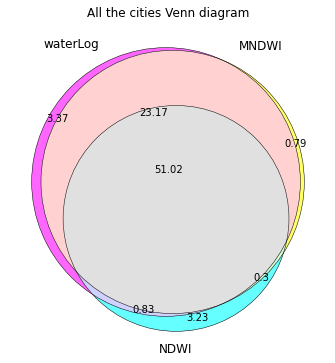

In [34]:
munic = 'All the cities'

waterSample    = df_SR[df_SR['surfClass'] == 1]
nonWaterSample = df_SR[df_SR['surfClass'] == 0]

def threshold(index):
    return max(nonWaterSample[index])

waterLog_T = threshold('waterLog')
MNDWI_T = threshold('MNDWI')
NDWI_T = threshold('NDWI')

waterList = df_SR[df_SR['surfClass'] == 1]
countWater = round(sum(1 for x, y, z in zip(waterList['waterLog'], waterList['MNDWI'], waterList['NDWI']) 
                       if x >= waterLog_T or y >= MNDWI_T or z >= NDWI_T)/len(waterSample)*100,2)
outside = round(100-countWater, 2)

indexesIntersection = round(sum(1 for x, y, z in zip(waterList['waterLog'], waterList['MNDWI'], waterList['NDWI']) 
                         if x >= waterLog_T and y >= MNDWI_T and z >= NDWI_T)/len(waterSample)*100,2)
waterLog_MNDWI  = round(sum(1 for x, y in zip(waterList['waterLog'], waterList['MNDWI']) 
                        if x > waterLog_T and y >= MNDWI_T)/len(waterSample)*100,2)
waterLog_NDWI  = round(sum(1 for x, z in zip(waterList['waterLog'], waterList['NDWI'])  
                        if x > waterLog_T and z >= NDWI_T)/len(waterSample)*100,2)
MNDWI_NDWI  = round(sum(1 for y, z in zip(waterList['MNDWI'],    waterList['NDWI'])  
                        if y > MNDWI_T    and z >= NDWI_T)/len(waterSample)*100,2)

print('Thresholds')
print('waterLog: ',waterLog_T)
print('MNDWI: ',MNDWI_T)
print('NDWI: ', NDWI_T)
print()

waterLog = round(sum(1 for i in waterList['waterLog'] if i > waterLog_T)/len(waterSample)*100,2)
print('waterLog', waterLog,'%')
MNDWI = round(sum(1 for i in waterList['MNDWI'] if i > MNDWI_T)/len(waterSample)*100,2)
print('MNDWI', MNDWI,'%')
NDWI = round(sum(1 for i in waterList['NDWI'] if i > NDWI_T)/len(waterSample)*100,2)
print('NDWI', NDWI,'%')

print()
#print('Intersections')
#print('All the index', indexesIntersection,'%')
#print('waterLog and MNDWI', waterLog_MNDWI,'%')
#print('waterLog and NDWI', waterLog_NDWI,'%')
#print('MNDWI and NDWI', MNDWI_NDWI,'%')
print()
print('Correct classified', countWater,'%')                 
print('False negative rate:',outside,'%')
print()
onlyWaterLog = round(waterLog - waterLog_MNDWI - waterLog_NDWI + indexesIntersection,2)
onlyMNDWI    = round(MNDWI    - waterLog_MNDWI - MNDWI_NDWI + indexesIntersection,2)
onlyNDWI     = round(NDWI     - waterLog_NDWI  - MNDWI_NDWI + indexesIntersection,2)
#print('only WaterLog', onlyWaterLog)
#print('only MNDWI', onlyMNDWI)
#print('only NDWI', onlyNDWI)

vennDiagram = printVenn3(onlyWaterLog, onlyMNDWI, onlyNDWI, waterLog_MNDWI, waterLog_NDWI, 
                         MNDWI_NDWI, indexesIntersection, outside, munic)

#### Set theory for zero false positive for each city

Sao Paulo
Thresholds
waterLog:  0.5558810402501263
MNDWI:  0.40201567749160133
NDWI:  0.36030828516377644

waterLog 50.72 %
MNDWI 55.53 %
NDWI 24.61 %


Correct classified 60.09 %
False negative rate: 39.91 %

Only waterLog:  1.11
Only MNDWI:  5.14
Only NDWI:  3.19
WaterLog ∩ MNDWI - NDWI : 29.23
WaterLog ∩ NDWI - MNDWI : 0.26
MNDWI ∩ NDWI - WaterLog : 1.04
WaterLog ∩ MNDWI ∩ NDWI : 20.12
outside:  39.91


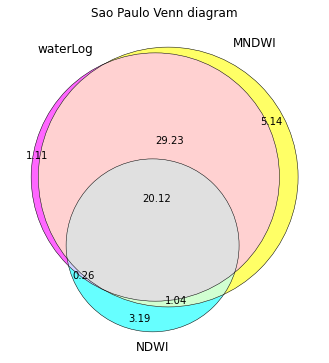

Curitiba
Thresholds
waterLog:  0.2842217318692702
MNDWI:  0.5236883942766296
NDWI:  0.54

waterLog 83.01 %
MNDWI 77.56 %
NDWI 0.0 %


Correct classified 83.01 %
False negative rate: 16.99 %

Only waterLog:  5.45
Only MNDWI:  0.0
Only NDWI:  0.0
WaterLog ∩ MNDWI - NDWI : 77.56
WaterLog ∩ NDWI - MNDWI : 0.0
MNDWI ∩ NDWI - WaterLog : 0.0
WaterLog ∩ MNDWI ∩ NDWI : 0.0
outside:  16.99


C:\Users\eduju\anaconda3\Lib\site-packages\matplotlib_venn\_venn3.py:61: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


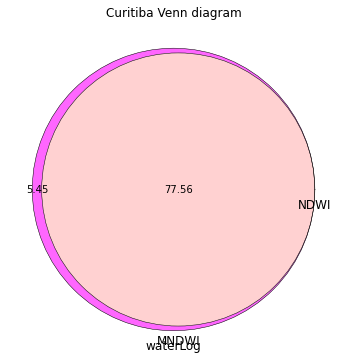

Florianopolis
Thresholds
waterLog:  0.22610729637048832
MNDWI:  0.43388942506549005
NDWI:  0.2883031301482702

waterLog 89.06 %
MNDWI 78.82 %
NDWI 94.84 %


Correct classified 96.19 %
False negative rate: 3.81 %

Only waterLog:  0.95
Only MNDWI:  0.0
Only NDWI:  7.13
WaterLog ∩ MNDWI - NDWI : 0.4
WaterLog ∩ NDWI - MNDWI : 9.29
MNDWI ∩ NDWI - WaterLog : 0.0
WaterLog ∩ MNDWI ∩ NDWI : 78.42
outside:  3.81


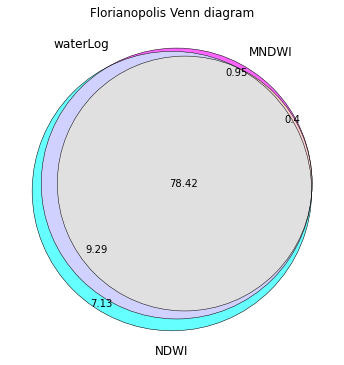

Porto Alegre
Thresholds
waterLog:  0.3517555503811389
MNDWI:  0.4803625377643504
NDWI:  0.38116591928251126

waterLog 92.28 %
MNDWI 89.8 %
NDWI 93.42 %


Correct classified 95.07 %
False negative rate: 4.93 %

Only waterLog:  0.8
Only MNDWI:  0.0
Only NDWI:  2.79
WaterLog ∩ MNDWI - NDWI : 0.85
WaterLog ∩ NDWI - MNDWI : 1.68
MNDWI ∩ NDWI - WaterLog : 0.0
WaterLog ∩ MNDWI ∩ NDWI : 88.95
outside:  4.93


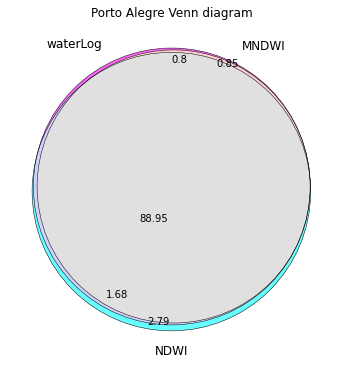

Buenos Aires
Thresholds
waterLog:  0.4528693677991842
MNDWI:  0.5135869565217391
NDWI:  0.40803382663847787

waterLog 75.19 %
MNDWI 66.06 %
NDWI 40.5 %


Correct classified 78.22 %
False negative rate: 21.78 %

Only waterLog:  5.5
Only MNDWI:  0.33
Only NDWI:  2.68
WaterLog ∩ MNDWI - NDWI : 31.9
WaterLog ∩ NDWI - MNDWI : 3.99
MNDWI ∩ NDWI - WaterLog : 0.03
WaterLog ∩ MNDWI ∩ NDWI : 33.8
outside:  21.78


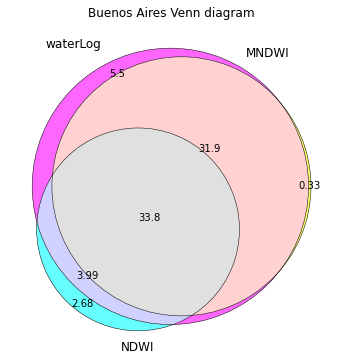

Vina del Mar
Thresholds
waterLog:  0.2796118105213389
MNDWI:  0.4308943089430894
NDWI:  0.35942028985507235

waterLog 94.96 %
MNDWI 86.13 %
NDWI 86.54 %


Correct classified 96.14 %
False negative rate: 3.86 %

Only waterLog:  6.91
Only MNDWI:  0.0
Only NDWI:  1.18
WaterLog ∩ MNDWI - NDWI : 2.69
WaterLog ∩ NDWI - MNDWI : 1.92
MNDWI ∩ NDWI - WaterLog : 0.0
WaterLog ∩ MNDWI ∩ NDWI : 83.44
outside:  3.86


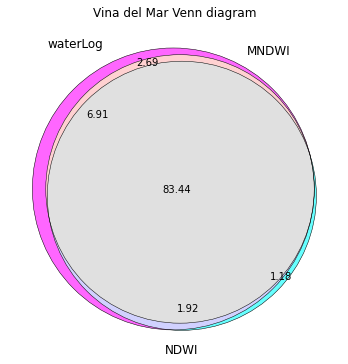

In [35]:
for munic in listCity:
    df_city = df_SR[df_SR['city'] == munic]

    waterSample = df_city[df_city['surfClass'] == 1]
    nonWaterSample = df_city[df_city['surfClass'] == 0]
    
    def threshold(index):
        return max(nonWaterSample[index])
    
    waterLog_T = threshold('waterLog')
    MNDWI_T = threshold('MNDWI')
    NDWI_T = threshold('NDWI')
    
    waterList = df_city[df_city['surfClass'] == 1]
    countWater = round(sum(1 for x, y, z in zip(waterList['waterLog'], waterList['MNDWI'], waterList['NDWI']) 
                           if x >= waterLog_T or y >= MNDWI_T or z >= NDWI_T)/len(waterSample)*100,2)
    outside = round(100-countWater, 2)
    
    indexesIntersection = round(sum(1 for x, y, z in zip(waterList['waterLog'], waterList['MNDWI'], waterList['NDWI']) 
                             if x >= waterLog_T and y >= MNDWI_T and z >= NDWI_T)/len(waterSample)*100,2)
    waterLog_MNDWI  = round(sum(1 for x, y in zip(waterList['waterLog'], waterList['MNDWI']) 
                            if x > waterLog_T and y >= MNDWI_T)/len(waterSample)*100,2)
    waterLog_NDWI  = round(sum(1 for x, z in zip(waterList['waterLog'], waterList['NDWI'])  
                            if x > waterLog_T and z >= NDWI_T)/len(waterSample)*100,2)
    MNDWI_NDWI  = round(sum(1 for y, z in zip(waterList['MNDWI'],    waterList['NDWI'])  
                            if y > MNDWI_T    and z >= NDWI_T)/len(waterSample)*100,2)
    
    print(munic)
    print('Thresholds')
    print('waterLog: ',waterLog_T)
    print('MNDWI: ',MNDWI_T)
    print('NDWI: ', NDWI_T)
    print()
    
    waterLog = round(sum(1 for i in waterList['waterLog'] if i > waterLog_T)/len(waterSample)*100,2)
    print('waterLog', waterLog,'%')
    MNDWI = round(sum(1 for i in waterList['MNDWI'] if i > MNDWI_T)/len(waterSample)*100,2)
    print('MNDWI', MNDWI,'%')
    NDWI = round(sum(1 for i in waterList['NDWI'] if i > NDWI_T)/len(waterSample)*100,2)
    print('NDWI', NDWI,'%')
    
    print()
    #print('Intersections')
    #print('All the index', indexesIntersection,'%')
    #print('waterLog and MNDWI', waterLog_MNDWI,'%')
    #print('waterLog and NDWI', waterLog_NDWI,'%')
    #print('MNDWI and NDWI', MNDWI_NDWI,'%')
    print()
    print('Correct classified', countWater,'%')                 
    print('False negative rate:',outside,'%')
    print()
    onlyWaterLog = round(waterLog - waterLog_MNDWI - waterLog_NDWI + indexesIntersection,2)
    onlyMNDWI    = round(MNDWI    - waterLog_MNDWI - MNDWI_NDWI + indexesIntersection,2)
    onlyNDWI     = round(NDWI     - waterLog_NDWI  - MNDWI_NDWI + indexesIntersection,2)
    #print('only WaterLog', onlyWaterLog)
    #print('only MNDWI', onlyMNDWI)
    #print('only NDWI', onlyNDWI)
    
    vennDiagram = printVenn3(onlyWaterLog, onlyMNDWI, onlyNDWI, waterLog_MNDWI, waterLog_NDWI, 
                             MNDWI_NDWI, indexesIntersection, outside, munic)
    
